In [1]:
import os
#import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [9]:
DATASETS_PATH = os.getenv('DATASETS_PATH','..\\..\\datasets')
MNIST_PATH = os.path.join(DATASETS_PATH, "mnist_784.1")
mnist = fetch_openml('mnist_784', version=1, data_home=MNIST_PATH, as_frame=False, )

In [13]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


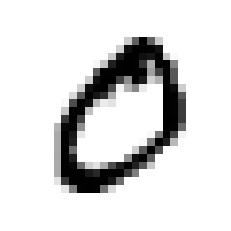

In [38]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [21]:
y[0]

'5'

In [23]:
y = y.astype(np.uint)
y[0]

5

In [50]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [25]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [42]:
index = 675
some_digit = X[index]
some_target = y[index]
prediction = sgd_clf.predict([some_digit])[0]
r = "not"
if(prediction):
    r=""
result = "The clasiffier says that it is " + r + " a 5 and it is actually a " + str(some_target)
print(result)

The clasiffier says that it is not a 5 and it is actually a 3


In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [57]:
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred == y_test_folds)
    print(n_correct/len(y_test_folds))

0.95035
0.96035
0.9604


In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [61]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [62]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])